# Overview

First step, let's make sure we know the target clearly. We are asked to create a model that predicts which passengers survived the Titanic shipwreck. And for the submission file format, it should with exactly 418 entries plus a header row, and 2 columns:
* PassengerID
* Surviced


# Loading and Visualization Data

First step, we will load the data and check it's basic information. There are also some edge cases that we need to deal with, like None or Empty value, or some of the columns inlude more than one type of data. We can check these potential issues by visualizing data.

In [6]:
import os
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

os.environ['train']='/kaggle/input/titanic/train.csv'
os.environ['test']='/kaggle/input/titanic/test.csv'
os.environ['submission']='/kaggle/input/titanic/gender_submission.csv'

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
dtrain=pd.read_csv(os.getenv('train'))
dtest=pd.read_csv(os.getenv('test'))
submission=pd.read_csv(os.getenv('submission'))
dtrain.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S


# Checking the Basic Information

In [29]:
print(dtrain.info())
print(70*"#")
print(dtrain.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
######################################################################
       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count      891.000   891.000 891.000 714.000 891.000 891.000 891.000
mean       446.000     0.384  

In [25]:
def check_df(df):
    print("############# Shape #############")
    print(df.shape)
    print("############# Types #############")
    print(df.dtypes)
    print("############# NA #############")
    print(df.isnull().sum())
    print("############# Quantiles #############")
    numeric_columns=df.select_dtypes(include=['number']).columns
    # return values at the given quantile over requested axis
    print(df[numeric_columns].quantile([0,0.05,0.50,0.95,0.99], 1).T)
    

check_df(dtrain)

############# Shape #############
(891, 12)
############# Types #############
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
############# NA #############
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
############# Quantiles #############
     0.000  0.050  0.500   0.950   0.990
0    0.000  0.000  1.000  17.575  21.115
1    0.000  0.300  1.000  61.298  69.286
2    0.000  0.000  3.000  20.577  24.915
3    0.000  0.300  1.000  47.670  52.014
4    0.000  0.000  3.000  26.915  33.383
..     ...    ...    ...     ...     ...
886  0.000  0.000  2.000 629.000 83

<Axes: xlabel='Survived'>

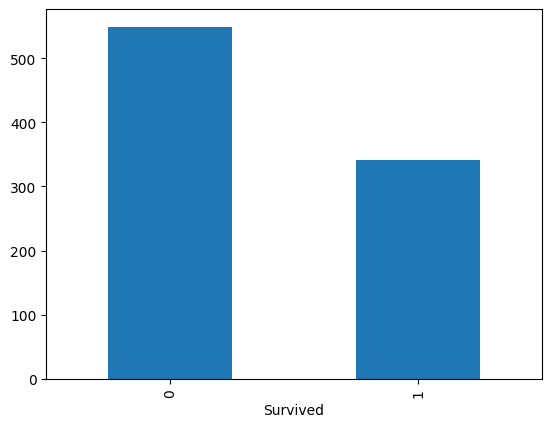

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df=dtrain.Survived.value_counts()
plot_df.plot(kind="bar")

<Axes: xlabel='Age', ylabel='Count'>

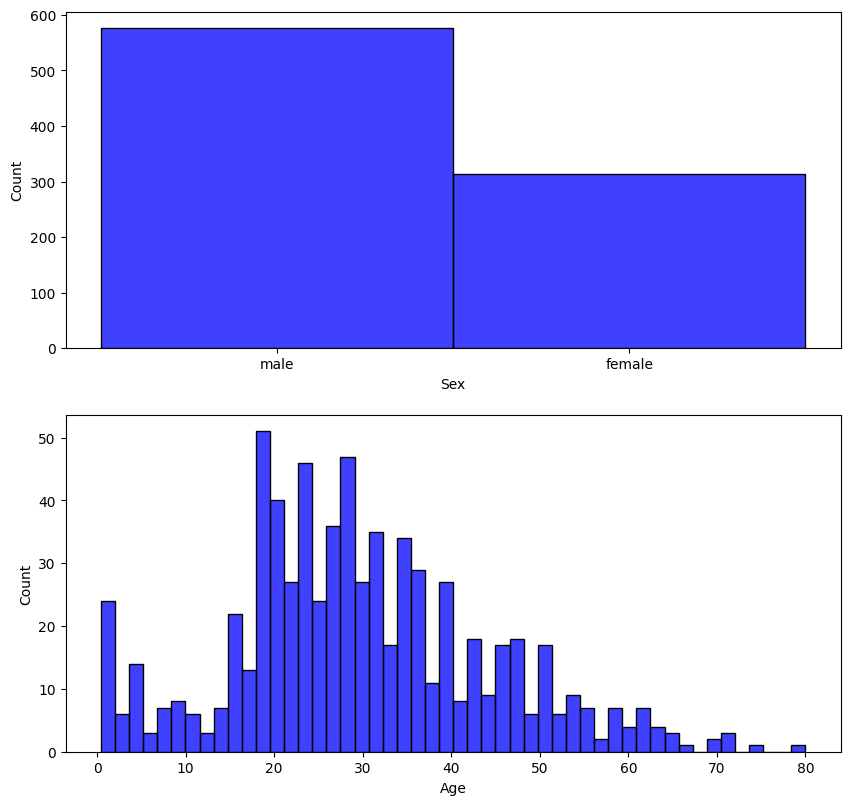

In [42]:
fig,ax=plt.subplots(2,1, figsize=(10,10))
plt.subplots_adjust(top=0.85) # 0.85 leaves 15% space at the top

sns.histplot(dtrain['Sex'], color='b', bins=50, ax=ax[0])
sns.histplot(dtrain['Age'], color='b', bins=50, ax=ax[1])

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


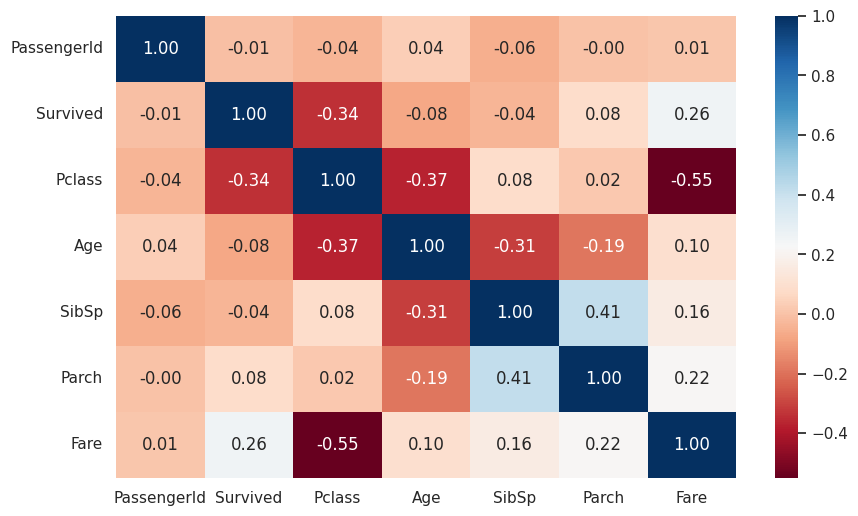

In [47]:
def get_num_col_names(df):
    num_cols=[col for col in df.columns if df[col].dtypes!="O"]
    return num_cols

number_columns=get_num_col_names(dtrain)
print(number_columns)


corr=dtrain[number_columns].corr()
sns.set(rc={'figure.figsize': (10,6)})
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.show()

# Acknowledge

* https://www.kaggle.com/code/alexisbcook/titanic-tutorial
* https://www.kaggle.com/code/gusthema/titanic-competition-w-tensorflow-decision-forests